# Jobs Analysis

## Setup

### Installs

In [1]:
%load_ext rpy2.ipython

In [2]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
sys.path.append("/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/Sample code")

In [4]:
!git clone https://github.com/crabcamp/lexrank.git

Cloning into 'lexrank'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 1232 (delta 24), reused 49 (delta 21), pack-reused 1172
Receiving objects: 100% (1232/1232), 791.25 KiB | 19.30 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [5]:
# needed for lexrank
!pip install urlextract

In [6]:
import sys
sys.path.append('/content/lexrank/')

from lexrank.lexrank import degree_centrality_scores

In [7]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 14.2 MB/s 
     |████████████████████████████████| 451 kB 80.2 MB/s 
     |████████████████████████████████| 10.1 MB 57.9 MB/s 
     |████████████████████████████████| 181 kB 51.4 MB/s 
     |████████████████████████████████| 653 kB 68.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [8]:
!pip install umap-learn
!pip install hdbscan
!pip install -U sentence-transformers

     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=700728cea472a81d806366e0c2d4f80a7ea2db068d46f2da37f2259cfc1a5e63
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=cc03a5839f5dd50a74f4c8e9698d901d446a9bd23aa289bc59a83fcbda0482db
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 5.2 MB 13.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330824 sha256=716d228cf507f96ed0039526d61

In [9]:
!pip install keybert

     |████████████████████████████████| 229 kB 12.5 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=1a3a1cb74df6f13ce99d04f56ff23b0159e810c9ae0f4d8accd75ffde0630a63
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
Successfully built keybert
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
thinc 8.0.15 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.1.1 which i

### Imports

In [10]:
import embed_cluster as ec

sklearn modules imported


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


transformer module imported


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:911: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import umap
#import umap.plot
import hdbscan
import spacy
from spacy.lang.en import English

from sklearn.manifold import MDS, TSNE

from textblob import TextBlob
import nltk
nltk.download('punkt')


import pickle

from keybert import KeyBERT


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# this is the code to add download the en_core_web_lg language model for spacy
# !python -m spacy download en_core_web_lg
#https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

# note: need to restart runtime after downloading

     |████████████████████████████████| 777.4 MB 6.4 kB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
rich 12.2.0 requires typing-extensions<5.0,>=4.0.0; python_version < "3.9", but you have typing-extensions 3.10.0.2 which is incompatible.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


## Utility Functions

In [ ]:
def select_and_filter(original_df, text_column):
    """
    Parameters
    ----------
    item : str
        Name of the column to filter based on.
    original_df : dataframe
        Original input dataframe with text columns.

    Returns
    -------
    filtered_df : dataframe
        Dataframe that has removed the NAs in the {item} column.
    item_list : list
        List of the text in the {item} column. This list is passed to the transformer model.
    """
    original_df['added_id'] = original_df.index + 1
    filtered_df = original_df.loc[pd.notnull(original_df[text_column])]
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {filtered_df.shape}.")
    
    item_list = filtered_df[text_column].to_list()
    print(f"The list has length {len(item_list)}.")
        
    return filtered_df, item_list

In [ ]:
def remove_name(text):
    # nlp = spacy.load("en_core_web_lg")

    doc = nlp(text)
    
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    #print(names)  

    if names:
        new_txt = text
        for name in names:
            new_txt = new_txt.replace(name, "")
            #print(new_txt)
        
        return new_txt
    
    else:
        return text

In [ ]:
def sentence_segmenter(data_frame, text_column):
    # first, create list from series of text
    
    entry_list = data_frame[text_column].to_list()
    
    # try using dictionary of lists
    
    new_df_dict = {'text_column': [],
                   'job_id': [],
                  #  'original_entry': [],
                   'split_sent': [],
                   'sent_num': []}
    
    # nlp = English()
    # nlp = spacy.load("en_core_web_lg")
    nlp.add_pipe('sentencizer')
    
    ## using the process of converting series to list and then iterating over list
    for i, entry in enumerate(entry_list):
      doc = nlp(entry)
      sentences = [sent.text.strip() for sent in doc.sents]
      if i % 1000 == 0:
        print(f"finished {i} entries.")

      try:  
        for j, sent in enumerate(sentences):
          # print(sent)
          # new_sent = remove_name(sent)
          new_df_dict['text_column'].append(text_column)
          new_df_dict['job_id'].append(data_frame['job_id'].iloc[i])
          # new_df_dict['original_entry'].append(entry)
          new_df_dict['split_sent'].append(sent)
          new_df_dict['sent_num'].append(j)

      except:
        print(f"Entry {i} sentence {j} failed")
          
    sentence_df = pd.DataFrame(new_df_dict)
    
    item_list = sentence_df['split_sent'].to_list()
    
    print(f"text column length {len(new_df_dict['text_column'])}")
    print(f"job id length {len(new_df_dict['job_id'])}")
    print(f"split sent length {len(new_df_dict['split_sent'])}")
    print(f"sent num length {len(new_df_dict['sent_num'])}")


    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {sentence_df.shape}.")
    print(f"The list has length {len(item_list)}.")

    
    return sentence_df, item_list
    


### Data Import

In [12]:
os.listdir()
proj_path = "/content/drive/Shareddrives/Project - Engineering Jobs and Non-academic Career Pathways"
os.chdir(proj_path)
os.listdir()

['exp Jobs analysis - tasks clusterings.ipynb',
 '[OLD] Jobs analysis.ipynb',
 'sustainability_US_20210411.csv',
 'eng_jobs.Rmd',
 'jobs_text.py',
 'bme_top50_skills.png',
 'project engineering jobs.Rproj',
 'sus_jobs.Rmd',
 'sustainability jobs map.png',
 '.Rhistory',
 '.gitignore',
 'paper - engineering jobs.docx',
 'eng_jobs.py',
 '.RData',
 'sustainability_Australia.csv',
 'civil_top50_skills.png',
 'environmental_engineering_Australia.csv',
 'Sustainability in Engineering Job Skills.png',
 'civ_ed_grad_df_20210916.csv',
 'biomedical_us_20210410.csv',
 'sustainability_cortext_20210411.csv',
 'sustainability_us_20210409.csv',
 'sustainability_UK.csv',
 'chem_eng_20210409.csv',
 'mechanical_us_20210411.csv',
 'civ_eng_20210409.csv',
 'environmental_us_20210410.csv',
 'mechanical_engineering_US.csv',
 'sustainability_cortext_20210411.zip',
 'electrical_engineering_US.csv',
 'sustainability jobs',
 '.Rproj.user',
 '.git',
 'Literature',
 'ABET_competencies',
 'abe work',
 'Skill percen

In [ ]:
# jobs_df = jobs_df.rename(columns={'Unnamed: 0': 'job_id'})
# jobs_df

##### Read in Onet Task Data

In [13]:
# task statements from https://www.onetcenter.org/dictionary/26.2/excel/task_statements.html
onet_tasks = pd.read_csv("Task Statements.csv")

In [14]:
onet_tasks

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent
...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent


Create unique tasks dataframe and list of tasks

In [15]:
unique_tasks_df = onet_tasks.drop_duplicates(subset=['Task'])

In [16]:
unique_tasks_df.reset_index(inplace=True)
unique_tasks_df = unique_tasks_df.rename(columns = {'index':'sent_id'})

In [24]:
unique_tasks_list = unique_tasks_df['Task'].to_list()

In [25]:
print(len(unique_tasks_list))

17976


###### Task embeddings

In [19]:
embed_tasks=False

In [20]:
if embed_tasks:
  task_embeddings = ec.embed_raw_text(unique_tasks_list, 'all-miniLM', max_seq_length=200)

In [21]:
# pickle the embeddings
if embed_tasks:
  pickle_out = open(f'onet_tasks_miniLM.pickle', 'wb')
  pickle.dump(task_embeddings, pickle_out)
  pickle_out.close()

In [22]:
pickle_in = open(f'onet_tasks_miniLM.pickle', 'rb')
task_embeddings = pickle.load(pickle_in)
pickle_in.close()

In [27]:
print(task_embeddings.shape)

(17976, 384)


### Dimension Reduction

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP projection completed. Started with (17976, 100). Returning (17976, 5).
Dimension of umap projection: (17976, 5).


(17976, 5)

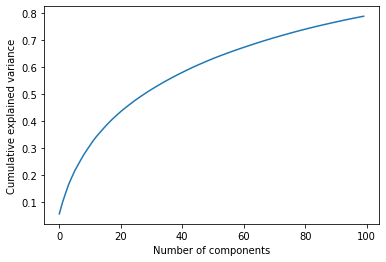

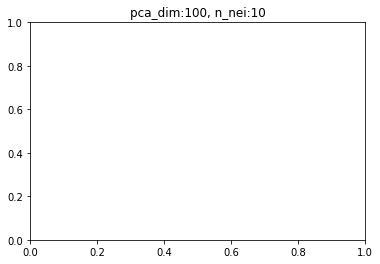

In [23]:
embed_param_dict = embed_param_dict= {'pca_dim': 100,
                   'n_neighbors': 10,
                   'min_dist': 0.0,
                   'n_components': 5,
                   'metric': 'cosine',
                   'random_state': 123}

embed_param_title = "pca_dim:" + str(embed_param_dict['pca_dim']) + ', n_nei:' + str(embed_param_dict['n_neighbors'])

lower_embed = ec.project_original_embedding(task_embeddings, 
                                            embed_param_dict, 
                                            to_low = True, 
                                            mid_to_low_method='umap',
                                            title=embed_param_title)


lower_embed.shape   


### Clustering

You have selected agglomerative for clustering.
Clustering completed.


<Figure size 432x288 with 0 Axes>

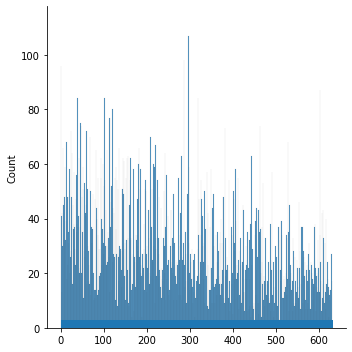

[485 211 115 ... 197 290  98]
The minimum cluster number is: 0.
The length of cluster_model.labels_ is 17976.
The length of the original corpus list is 17976.
Cluster  0
Cluster size: 96
['Acquire, distribute and store supplies.', 'Purchase necessary equipment.', 'Prepare and process requisitions and purchase orders for supplies and equipment.', 'Order and purchase equipment and supplies.', 'Purchase supplies, and arrange for outside services, such as deliveries, laundry, maintenance and repair, and trash collection.', 'Inventory products and order new supplies.', 'Arrange for transportation or storage of purchased products.', 'Direct availability and allocation of materials, supplies, and finished products.', 'Maintain inventory of shipping supplies, such as boxes, labels, tape, bubble wrap, loose packing materials, or tape guns.', 'Order or maintain inventory of telecommunications equipment for customer premises equipment (CPE), facilities, access networks, or backbone networks.', 'P

Index(['sent_id', 'O*NET-SOC Code', 'Title', 'Task ID', 'Task', 'Task Type',
       'Incumbents Responding', 'Date', 'Domain Source', 'cluster_label'],
      dtype='object')

In [28]:
# print("Currently clustering item:", item)
## For hdbscan: specify min_cluster_size, min_samples, alpha
## for agglomerative specify: n_clusters, linkage
## for kmeans specify: num_clusters
cluster_param_dict = {'min_cluster_size': 4, # hdbscan options
                      'min_samples': 1,
                      'cluster_selection_epsilon': 0.1,
                      'alpha': 1.0,
                      'metric': 'euclidean',
                      'agg_type': "threshold", # agglomerative options - can be "threshold"or "n_cluster"
                      'n_clusters': 60,
                      'threshold_val': 1.25,
                      'affinity': 'euclidean',
                      'linkage': 'ward',
                      'num_clusters': 30}

# version to use the lower-dimensional embedding for the clustering     
cluster_res = ec.cluster_embedding(data=lower_embed, original_corpus_list=unique_tasks_list, 
                  model='agglomerative', param_dict=cluster_param_dict, plot_option=True)




all_cluster_labels = cluster_res.labels_


#ai_sentence_df['cluster_label'] = all_cluster_labels

# if using a subset of the data
unique_tasks_df['cluster_label'] = all_cluster_labels

unique_tasks_df.shape
unique_tasks_df.columns

In [29]:
print(unique_tasks_df.columns)
print(unique_tasks_df.shape)

Index(['sent_id', 'O*NET-SOC Code', 'Title', 'Task ID', 'Task', 'Task Type',
       'Incumbents Responding', 'Date', 'Domain Source', 'cluster_label'],
      dtype='object')
(17976, 10)


In [34]:
unique_tasks_df

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,cluster_label
0,0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,485
1,1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,211
2,2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,115
3,3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,485
4,4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,173
...,...,...,...,...,...,...,...,...,...,...
17971,19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,253
17972,19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,313
17973,19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,197
17974,19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,290


In [30]:
unique_tasks_df.to_csv("onet_tasks_clustered.csv", index=False)

### Cluster Summarization

#### Lexrank Summarization

In [31]:
calculate_lexrank = True

In [32]:
import nltk
from sentence_transformers import SentenceTransformer, util
import numpy as np
from lexrank import LexRank
from lexrank.lexrank import degree_centrality_scores
import math

In [33]:
np.sort(unique_tasks_df.cluster_label.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [35]:
if calculate_lexrank:
  lexrank_summary_dict = {'task_id':[],
                        'cluster_label': [],
                        'Task': []}


  bad_clusters = []

  # model = SentenceTransformer('paraphrase-mpnet-base-v2')
  model = SentenceTransformer('all-MiniLM-L12-v2')


  for i in np.sort(unique_tasks_df['cluster_label'].unique()):
      try:
        print(f"\nWorking on cluster {i}")
        temp_cl_df = unique_tasks_df[unique_tasks_df['cluster_label'] == i]
        
        # decided not to use previously calculated embeddings because they would need to be converted to tensor
        # test_embed = test_df.loc[:,'0':'74']
        
        
        sentences = temp_cl_df['Task'].to_list()
        

        embeddings = model.encode(sentences, convert_to_tensor=True)
        # embeddings = test_embed
        
        print(f"Finished embedding for cluster {i}.")
        
        
        #Compute the pair-wise cosine similarities
        cos_scores = util.pytorch_cos_sim(embeddings, embeddings).numpy()
        
        print(f"Calculated cosine similarities for cluster {i}.")
        #Compute the centrality for each sentence
        centrality_scores = degree_centrality_scores(cos_scores, threshold=None)
        
        print(f"Completed centrality scores for cluster {i}.")
        #We argsort so that the first element is the sentence with the highest score
        most_central_sentence_indices = np.argsort(-centrality_scores)
        cl_sent_num = len(sentences)
        sum_sent_cap = int(math.ceil(cl_sent_num * 0.2))
        
        #Print the top 20% of sentences with the highest scores
        print(f"Summary for cluster {i}: ")
        for idx in most_central_sentence_indices[0:sum_sent_cap]:
            print(sentences[idx].strip())
            
            lexrank_summary_dict['task_id'].append(temp_cl_df['Task ID'].iloc[idx])
            lexrank_summary_dict['cluster_label'].append(i)
            lexrank_summary_dict['Task'].append(sentences[idx].strip())
      except:
        bad_clusters.append(i)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
Working on cluster 188
Finished embedding for cluster 188.
Calculated cosine similarities for cluster 188.
Completed centrality scores for cluster 188.
Summary for cluster 188: 
Pack goods for shipping, using tools such as staplers, strapping machines, and hammers.
Bag, box, wrap, or gift-wrap merchandise, and prepare packages for shipment.
Stack finished packaged items, or wrap protective material around each item, and pack the items in cartons or containers.
Clean packaging containers, line and pad crates, or assemble cartons to prepare for product packing.

Working on cluster 189
Finished embedding for cluster 189.
Calculated cosine similarities for cluster 189.
Completed centrality scores for cluster 189.
Summary for cluster 189: 
Deliver artwork on courier trips.

Working on cluster 190
Finished embedding for cluster 190.
Calculated cosine similarities for cluster 190.
Completed centrality scores for cluster 190.
Summary for clust

In [36]:
if calculate_lexrank:
  lexrank_summary_df = pd.DataFrame(lexrank_summary_dict)

In [40]:
if calculate_lexrank:
  lexrank_summary_df

In [ ]:
# if calculate_lexrank:
  # len(lexrank_summary_df.sent_id.unique())

In [38]:
if calculate_lexrank:
  lexrank_summary_df.to_csv(f"onet_tasks_lexrank_summary.csv", index = False)

In [ ]:
lexrank_summary_df = pd.read_csv("onet_tasks_lexrank_summary.csv")

### Cosine Similarity

In [ ]:
# calculate similarity
from scipy.spatial.distance import cdist

In [ ]:
n = 3
threshold = 0.7

In [ ]:
# n = 7




sim_tasks_dict = {'batch_num': [],
                  'job_id':[],
                  'sent_id':[],
                  'original_sent_text':[],
                  'similar_task_id':[],
                  'similarity_rank':[],
                  'similarity_score':[],
                  'similar_task_text':[]}


# for i in np.sort(unlabeled_sent_df['cluster_label'].unique()):
#for i in range(10):

for i in range(10):
  test_df = jobs_df[jobs_df['batch_num'] == i]

  test_df['clean_description'] = test_df['description'].str.replace("\n", ". ")
  
  nlp = spacy.load("en_core_web_lg")
  if i > 0:
    del description_sent_df
    del description_sent_list
  description_sent_df, description_sent_list = sentence_segmenter(test_df, 'clean_description')

  description_sent_df.reset_index(inplace=True)
  description_sent_df = description_sent_df.rename(columns = {'index':'sent_id'})

  print(f"working on batch {i}.")

  # try:
  # print(f"\nWorking on cluster {i}")
  # temp_cl_df = unlabeled_sent_df[unlabeled_sent_df['cluster_label'] == i]

  description_sent_list = description_sent_df.split_sent.to_list()

  if i > 0:
    del description_sent_embeddings
  description_sent_embeddings = ec.embed_raw_text(description_sent_list, 'all-miniLM', max_seq_length=200)

  print(description_sent_embeddings.shape)

  print("Calculating similarity scores")
  cosine_df = 1 - cdist(description_sent_embeddings, task_embeddings, metric='cosine')

  if i > 0:
    del scores_df
  scores_df = pd.DataFrame(cosine_df)

  for j in range(scores_df.shape[0]):
    # top_n_scores = scores_df.iloc[j,:].nlargest(n)
    # indices = top_n_scores.index
    
    #print(top_n_scores)
    # pick scores over threshold
    scores = scores_df.iloc[j,:]
    indices = scores[scores > threshold].index


    
    #print(indices)


    for num, k in enumerate(indices):
      # print(num)
      # print(i)
      # print(f"Item {j} had score {top_n_scores.iloc[num]}. The task was: {tasks_text[j]}")
      # print(f"The original classification of this task was {tasks_df['label'].iloc[j]}")

      #print(f"Cluster label: {temp_cl_df['cluster_label'].iloc[j]}")
      #print(labeled_sent_df['sum_sent'].iloc[k])
      #print(temp_cl_df['split_sent'].iloc[j])

      sim_tasks_dict['batch_num'].append(i)
      sim_tasks_dict['job_id'].append(description_sent_df['job_id'].iloc[j])
      sim_tasks_dict['sent_id'].append(description_sent_df['sent_id'].iloc[j])
      sim_tasks_dict['original_sent_text'].append(description_sent_df['split_sent'].iloc[j])
      # sim_sents_dict['original_cluster_label'].append(temp_cl_df['cluster_label'].iloc[j])
      sim_tasks_dict['similarity_rank'].append(num)
      sim_tasks_dict['similar_task_text'].append(unique_tasks_df['Task'].iloc[k])
      sim_tasks_dict['similar_task_id'].append(unique_tasks_df['Task ID'].iloc[k])
      sim_tasks_dict['similarity_score'].append(scores.iloc[k])
      # sim_sents_dict['similar_sent_label'].append(unique_tasks_df['manual_text_label_v2'].iloc[k]) # may need to make this manual_text_label instead of codebook_v2



  # except:
  #   print(f"Error encountered in batch {i}.")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 entries.
text column length 9073
job id length 9073
split sent length 9073
sent num length 9073
Filtered dataframe for clean_description.
Dataframe has size (9073, 4).
The list has length 9073.
working on batch 0.


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 9073.
The dimension of the embedding is (9073, 384).
(9073, 384)
Calculating similarity scores
finished 0 entries.
text column length 9284
job id length 9284
split sent length 9284
sent num length 9284
Filtered dataframe for clean_description.
Dataframe has size (9284, 4).
The list has length 9284.
working on batch 1.
Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 9284.
The dimension of the embedding is (9284, 384).
(9284, 384)
Calculating similarity scores
finished 0 entries.
text column length 9163
job id length 9163
split sent length 9163
sent num length 9163
Filtered dataframe for clean_description.
Dataframe has size (9163, 4).
The list has length 9163.
working on batch 2.
Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Ori

In [ ]:
sim_tasks_df = pd.DataFrame(sim_tasks_dict)
sim_tasks_df

,batch_num,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t..."
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin..."
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.
...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth..."
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con..."
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc..."
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...


In [ ]:
# scores = scores_df.iloc[5,:]
# scores[scores >0.7].index


In [ ]:
threshold = 0.7
most_sim_df = sim_tasks_df[sim_tasks_df['similarity_score'] > threshold]

In [ ]:
most_sim_df

,batch_num,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t..."
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin..."
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.
...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth..."
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con..."
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc..."
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...


In [ ]:
most_sim_df = pd.merge(most_sim_df, unique_tasks_df, how="left", left_on="similar_task_text", right_on="Task")

In [ ]:
most_sim_df

,batch_num,job_id,sent_id_x,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text,sent_id_y,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t...",4078,17-3026.00,Industrial Engineering Technologists and Techn...,22024,"Assist engineers in developing, building, or t...",NaN,NaN,11/2020,Analyst
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin...",13337,43-6011.00,Executive Secretaries and Executive Administra...,2771,"Prepare invoices, reports, memos, letters, fin...",Core,141.0,07/2017,Incumbent
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.,4897,19-3032.00,Industrial-Organizational Psychologists,7565,Identify training and development needs.,Core,68.0,07/2012,Incumbent
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...,5509,21-1011.00,Substance Abuse and Behavioral Disorder Counse...,5592,Attend training sessions to increase knowledge...,Core,54.0,08/2021,Incumbent
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.,4571,19-2011.00,Astronomers,21171,Mentor graduate students and junior colleagues.,Core,22.0,08/2020,Occupational Expert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth...",7617,27-1013.00,"Fine Artists, Including Painters, Sculptors, a...",11004,"Collaborate with engineers, mechanics, and oth...",Supplemental,49.0,07/2017,Incumbent
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con...",1480,13-1051.00,Cost Estimators,83,"Confer with engineers, architects, owners, con...",Core,22.0,07/2016,Occupational Expert
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc...",3886,17-3011.00,Architectural and Civil Drafters,21942,"Prepare cost estimates, contracts, bidding doc...",NaN,NaN,11/2020,Analyst
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...,14219,47-2121.00,Glaziers,11505,Confer with customers to determine project req...,Supplemental,66.0,07/2014,Incumbent


In [ ]:
most_sim_df.to_csv("most_sim_tasks_df_mechanical_batched.csv", index=False)